## Wine Recognition Data

Data Source: https://archive.ics.uci.edu/ml/datasets/Wine

Data Set Information from Source:

These data are the results of a chemical analysis of
      wines grown in the same region in Italy but derived from three
      different cultivars.
      The analysis determined the quantities of 13 constituents
      found in each of the three types of wines. 

The attributes are

 	1) Alcohol
 	2) Malic acid
 	3) Ash
 	4) Alcalinity of ash  
 	5) Magnesium
 	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
 	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline       
    

Number of Instances

    class 1 59
	class 2 71
	class 3 48

Number of Attributes 
	
	13

For Each Attribute:

	All attributes are continuous
	
	No statistics available, but suggest to standardise
	variables for certain uses (e.g. for us with classifiers
	which are NOT scale invariant)

	NOTE: 1st attribute is class identifier (1-3)

Missing Attribute Values: None



In [1]:
%matplotlib inline

import os
import json
import time
import pickle
import requests


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#suppressing FutureWarnings, but retain visibility on all other warnings.
from warnings import simplefilter
simplefilter(action='ignore', category=FutureWarning)

In [3]:
URL = "http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data"

def fetch_data(fname='wine.csv'):
    """
    Helper method to retreive the ML Repository dataset.
    """
    response = requests.get(URL)
    outpath  = os.path.abspath(fname)
    with open(outpath, 'wb') as f:
        f.write(response.content)
    
    return outpath

# Fetch the data if required
DATA = fetch_data()

In [4]:
FEATURES  = [
    "class",
    "alcohol", 
    "malic_acid", 
    "ash", 
    "alcalinity_of_ash", 
    "magnesium", 
    "total_phenols", 
    "flavanoids", 
    "nonflavanoid_phenols", 
    "proanthocyanins", 
    "color_intensity", 
    "hue", 
    "od280_od315", 
    "proline"
]

CLASS_LABEL_MAP = {
    1: "cultivar 1",
    2: "cultivar 2",
    3: "cultivar 3",
}
                   
# Read the data into a DataFrame
df = pd.read_csv(DATA, header=None, names=FEATURES)

# Convert class labels into text
df['class'] = df['class'].map(CLASS_LABEL_MAP)

# Describe the dataset
print(df.describe(include='all'))

             class     alcohol  malic_acid         ash  alcalinity_of_ash  \
count          178  178.000000  178.000000  178.000000         178.000000   
unique           3         NaN         NaN         NaN                NaN   
top     cultivar 2         NaN         NaN         NaN                NaN   
freq            71         NaN         NaN         NaN                NaN   
mean           NaN   13.000618    2.336348    2.366517          19.494944   
std            NaN    0.811827    1.117146    0.274344           3.339564   
min            NaN   11.030000    0.740000    1.360000          10.600000   
25%            NaN   12.362500    1.602500    2.210000          17.200000   
50%            NaN   13.050000    1.865000    2.360000          19.500000   
75%            NaN   13.677500    3.082500    2.557500          21.500000   
max            NaN   14.830000    5.800000    3.230000          30.000000   

         magnesium  total_phenols  flavanoids  nonflavanoid_phenols  \
coun

In [5]:
# Determine the shape of the data
print("{} instances with {} features\n".format(*df.shape))

# Determine the frequency of each class
print(pd.crosstab(index=df['class'], columns="count"))

178 instances with 14 features

col_0       count
class            
cultivar 1     59
cultivar 2     71
cultivar 3     48


In [6]:
from sklearn.preprocessing import LabelEncoder

# Extract our X and y data
X = df[FEATURES[1:]]
y = df['class']

# Encode our target variable
encoder = LabelEncoder().fit(y)
y = encoder.transform(y)

print(X.shape, y.shape)

(178, 13) (178,)


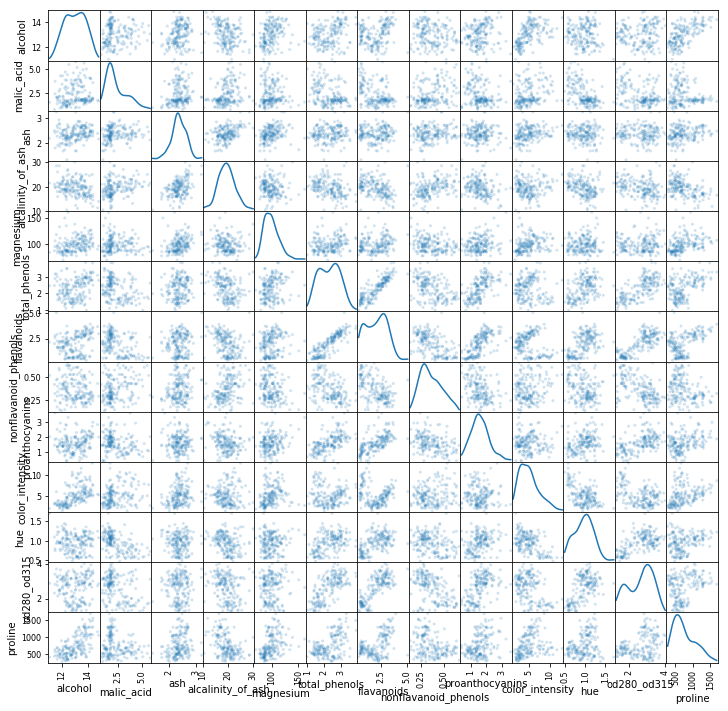

In [7]:
# Create a scatter matrix of the dataframe features
from pandas.plotting import scatter_matrix
scatter_matrix(X, alpha=0.2, figsize=(12, 12), diagonal='kde')
plt.show()

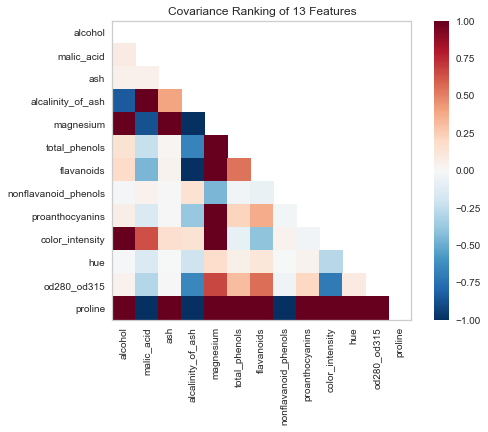

In [8]:
from yellowbrick.features import Rank2D

# Instantiate the visualizer with the Covariance ranking algorithm
visualizer = Rank2D(features=FEATURES[1:], algorithm='covariance')

visualizer.fit(X, y)                # Fit the data to the visualizer
visualizer.transform(X)             # Transform the data
visualizer.poof()                   # Draw/show/poof the data

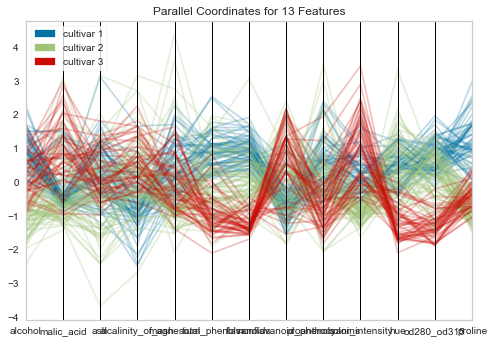

In [9]:
from yellowbrick.features import ParallelCoordinates

_ = ParallelCoordinates(classes=encoder.classes_, normalize='standard').fit_transform_poof(X, y)

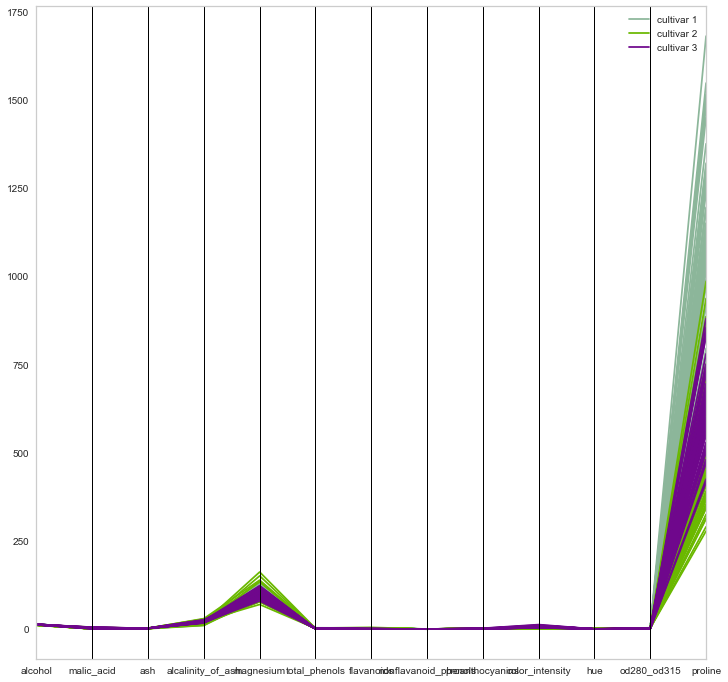

In [10]:
from pandas.plotting import parallel_coordinates
plt.figure(figsize=(12,12))
parallel_coordinates(df, 'class')
plt.show()

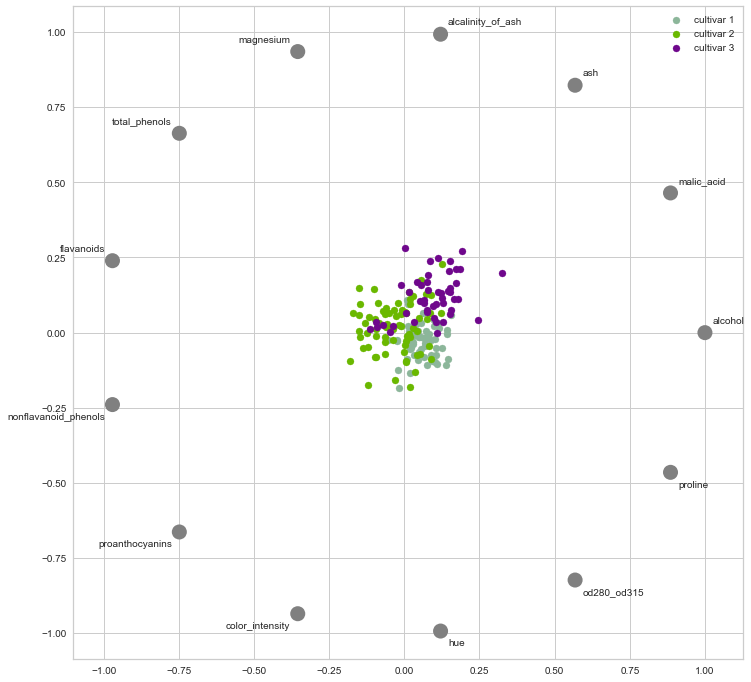

In [11]:
from pandas.plotting import radviz
plt.figure(figsize=(12,12))
radviz(df, 'class')
plt.show()

## Data Extraction 

Using `Bunch` class to "expose a data API that is very familiar to how we've trained on our toy datasets in the past." 

In [12]:
from sklearn.datasets.base import Bunch

DATA_DIR = os.getcwd()

# Show the contents of the data directory
for name in os.listdir(DATA_DIR):
    if name.startswith("."): continue
    print("- {}".format(name))

- car.data
- car.names
- glass-knn-classifier.pickle
- glass-random-forest-classifier.pickle
- glass.csv
- glass.names
- glassmeta.json
- MLdemo_notes_07202019.ipynb
- multinomial-naive-bayes.pickle
- uci_lab_07202019.ipynb
- uci_lab_winedata_07212019.ipynb
- uci_lab_winedata_example.ipynb
- uci_workshop_glass_ak.ipynb
- Untitled.ipynb
- wine-.pickle
- wine-knn-classifier.pickle
- wine-logistic-regression.pickle
- wine-random-forest-classifier.pickle
- wine.csv
- wine.data
- wine.names
- winemeta.json


In [13]:
def load_data(root=DATA_DIR):
    # Construct the `Bunch` for the wine dataset
    filenames     = {
        'meta': os.path.join(root, 'winemeta.json'),
        'rdme': os.path.join(root, 'wine.names'),
        'data': os.path.join(root, 'wine.data'),
    }

    # Load the meta data from the meta json
    with open(filenames['meta'], 'r') as f:
        meta = json.load(f)
        target_names  = meta['target_names']
        feature_names = meta['feature_names']

    # Load the description from the README. 
    with open(filenames['rdme'], 'r') as f:
        DESCR = f.read()

    # Load the dataset from the text file.
    dataset = np.loadtxt(filenames['data'], delimiter = ",")

    # Extract the target from the data
    data   = dataset[:, 1:]
    target = dataset[:, 0]

    # Create the bunch object
    return Bunch(
        data=data,
        target=target,
        filenames=filenames,
        target_names=target_names,
        feature_names=feature_names,
        DESCR=DESCR
    )

# Save the dataset as a variable we can use.
dataset = load_data()

print(dataset.data.shape)
print(dataset.target.shape)

(178, 13)
(178,)


## Classification 

Try a range of classification models and compare performance.  Random Forest and Logistic Regresion have the highest validation scores.

In [14]:
from sklearn import metrics

from sklearn.model_selection import KFold
from yellowbrick.model_selection import ValidationCurve

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

In [15]:
def fit_and_evaluate(dataset, model, label, **kwargs):
    """
    Because of the Scikit-Learn API, we can create a function to
    do all of the fit and evaluate work on our behalf!
    """
    start  = time.time() # Start the clock! 
    scores = {'precision':[], 'recall':[], 'accuracy':[], 'f1':[]}
    
    kf = KFold(n_splits = 12, shuffle=True)
    
    for train, test in kf.split(dataset.data):
        X_train, X_test = dataset.data[train], dataset.data[test]
        y_train, y_test = dataset.target[train], dataset.target[test]
        
        estimator = model(**kwargs)
        estimator.fit(X_train, y_train)
        
        expected  = y_test
        predicted = estimator.predict(X_test)
        
        # Append our scores to the tracker
        scores['precision'].append(metrics.precision_score(expected, predicted, average="weighted"))
        scores['recall'].append(metrics.recall_score(expected, predicted, average="weighted"))
        scores['accuracy'].append(metrics.accuracy_score(expected, predicted))
        scores['f1'].append(metrics.f1_score(expected, predicted, average="weighted"))

    # Report
    print("Build and Validation of {} took {:0.3f} seconds".format(label, time.time()-start))
    print("Validation scores are as follows:\n")
    print(pd.DataFrame(scores).mean())
    
    # Write official estimator to disk
    estimator = model(**kwargs)
    estimator.fit(dataset.data, dataset.target)
    
    outpath = label.lower().replace(" ", "-") + ".pickle"
    with open(outpath, 'wb') as f:
        pickle.dump(estimator, f)

    #Suppress the following line for publicly-facing notebook
    #print("\nFitted model written to:\n{}".format(os.path.abspath(outpath)))
    

In [16]:
# Perform kNN Classification
fit_and_evaluate(dataset, KNeighborsClassifier, "Wine kNN Classifier", n_neighbors=12)

Build and Validation of Wine kNN Classifier took 0.038 seconds
Validation scores are as follows:

precision    0.737725
recall       0.701984
accuracy     0.701984
f1           0.694045
dtype: float64


In [17]:
# Perform Random Forest Classification
fit_and_evaluate(dataset, RandomForestClassifier, "Wine Random Forest Classifier")

Build and Validation of Wine Random Forest Classifier took 0.116 seconds
Validation scores are as follows:

precision    0.968955
recall       0.960714
accuracy     0.960714
f1           0.959751
dtype: float64


In [18]:
# Perform Multinomial Naive Bayes
fit_and_evaluate(dataset, MultinomialNB, "Multinomial Naive Bayes")

Build and Validation of Multinomial Naive Bayes took 0.022 seconds
Validation scores are as follows:

precision    0.872235
recall       0.855556
accuracy     0.855556
f1           0.855476
dtype: float64


In [19]:
# Perform Logistic Regression
fit_and_evaluate(dataset, LogisticRegression, "Wine Logistic Regression")

Build and Validation of Wine Logistic Regression took 0.069 seconds
Validation scores are as follows:

precision    0.960074
recall       0.953968
accuracy     0.953968
f1           0.954771
dtype: float64


**Try Validation Curves for the two best performing models to examine training and test scores for different parameter values.**

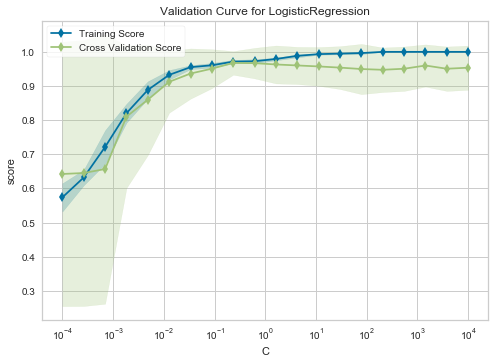

In [20]:
# Create the validation curve visualizer
cv = KFold(12)
viz = ValidationCurve(
    LogisticRegression(), param_name="C", param_range=np.logspace(-4, 4, 20),
    logx=True, cv=cv, scoring="f1_weighted", n_jobs=8,
)

viz.fit(X, y)
viz.poof()

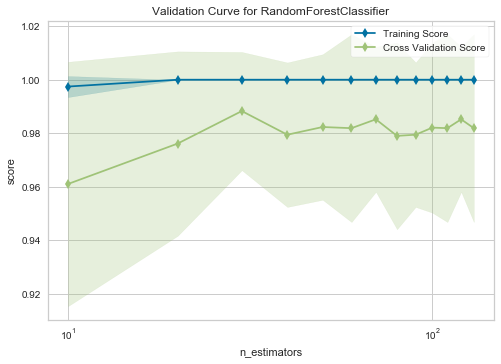

In [21]:
viz = ValidationCurve(
    RandomForestClassifier(), param_name="n_estimators", param_range=list(range(10,131,10)),
    logx=True, cv=cv, scoring="f1_weighted", n_jobs=8,
)

viz.fit(X, y)
viz.poof()